In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import folium
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [100]:
from google.colab import drive 
drive.mount('/content/gdrive/')

# Load dataset
df_data=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Merge.csv')
df_mergeData = df_data[['IncomeGroup', 'Value']]
df_data.drop(['Unnamed: 0'],axis=1, inplace=True)
df_data.head()

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,IncomeGroup,Value
0,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2014,Low income,3.033473
1,Albania,ALB,Population growth (annual %),SP.POP.GROW,2014,Upper middle income,-0.099830
2,Algeria,DZA,Population growth (annual %),SP.POP.GROW,2014,Upper middle income,1.940399
3,American Samoa,ASM,Population growth (annual %),SP.POP.GROW,2014,Upper middle income,0.238405
4,Andorra,ADO,Population growth (annual %),SP.POP.GROW,2014,High income: nonOECD,-4.191941


In [101]:
df_data.shape

(214, 7)

In [102]:
warnings.filterwarnings('ignore')
country_geo = '/content/gdrive/My Drive/Colab Notebooks/world-countries.json'

In [103]:

# ──────────────────────────────────────────
# PREPROCESSING FUNCTIONS
# ──────────────────────────────────────────
# SCAILING
def SCALING(data, scaler):
    df_scaled = scaler.fit_transform(data)
    return df_scaled

# ENCODING
def ENCODING(df, column):
  encoder = LabelEncoder()
  encoder.fit(df[column])
  df[column] = encoder.transform(df[column])
  return df


def scatter_plot(result, data, model_type):
    plt.title(model_type)
    plt.scatter(data['IncomeGroup'], data['Value'], c=result, alpha=1.0)
    plt.xlabel("IncomeGroup")
    plt.ylabel("population growth")
    plt.xticks([0, 1, 2, 3, 4])
    plt.show()

# ──────────────────────────────────────────
#          MAKE Visualize Map
# ──────────────────────────────────────────
#일단은 parameter가 바뀔때마다 지도를 업데이트를 시켰는데
#추후에 회의를 통해 best case를 정하고 best case만 따로 저장시키는게 좋을 것 같아요.
def make_Map(data, method):
    plot_data = data[['CountryCode', method]]

    map = folium.Map([20, 10], zoom_start=3)

    map.choropleth(geo_data=country_geo, data=plot_data,
                   columns=['CountryCode', method],
                   key_on='feature.id',
                   fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2, legend_name='Clustering Result')
    map.save('Clustering Result Map.html')

    plot_data = data[['CountryCode', 'Value']]

    map = folium.Map([20, 10], zoom_start=3)

    map.choropleth(geo_data=country_geo, data=plot_data,
                   columns=['CountryCode', 'Value'],
                   key_on='feature.id',
                   fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2, legend_name='Population growth (annual %)')
    map.save('Map according to Value value.html')

# #K-MEANS PARAMETER


def KMEANS_CLUSTERING(dataset1, dataset2):
  n_clusters = [2, 3, 4, 5, 6]
  max_iter = [50, 100, 200, 300]
  for i in n_clusters:
      for j in max_iter:
          print("n_cluster = {}, max_iter = {}".format(i,j))
          kmeans = KMeans(n_clusters=i, max_iter=j)
          pd_kmeans = kmeans.fit_predict(dataset1)
          dataset2['KMeans']=pd_kmeans
          # ──────────────────────────────────────────
          #  VISUALIZE BEST RESULT AS SCATTER PLOT
          # ──────────────────────────────────────────
          scatter_plot(pd_kmeans, dataset1, 'K-Means')
          make_Map(dataset2, 'KMeans')




# Compute DBSCAN
def DBSCAN_CLUSTERING(dataset1, dataset2):

  # DBSCAN PARAMETER
  eps = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
  min_samples = [3, 5, 10, 15, 20, 30, 50, 100]
  for i in eps:
      for j in min_samples:
          print("eps = {}, min_samples = {}".format(i,j))
          dbscan = DBSCAN(eps=i, min_samples=j)
          pd_dbscan = dbscan.fit_predict(dataset1)
          dataset2['DBSCAN'] = pd_dbscan
          # ──────────────────────────────────────────
          #  VISUALIZE BEST RESULT AS SCATTER PLOT
          # ──────────────────────────────────────────
          scatter_plot(pd_dbscan, dataset1, 'DBSCAN')
          make_Map(dataset2, 'DBSCAN')



def EM_CLUSTERING(dataset1, dataset2):
  # EM PARAMETER
  n_components = [2, 3, 4, 5, 6]
  max_iter = [50, 100, 200, 300]
  for i in n_components:
      for j in max_iter:
          print("n_components = {}, max_iter = {}".format(i,j))
          em = GaussianMixture(n_components=i, max_iter=j)
          pd_em = em.fit_predict(dataset1)
          dataset2['EM']=pd_em
          # ──────────────────────────────────────────
          #  VISUALIZE BEST RESULT AS SCATTER PLOT
          # ──────────────────────────────────────────
          scatter_plot(pd_em, dataset1, 'EM')
          make_Map(dataset2, 'EM')



In [104]:

df_mergeData = ENCODING(df_mergeData, 'IncomeGroup') # Label encoding 

df_mergeData.head()


,IncomeGroup,Value
0,2,3.033473
1,4,-0.099830
2,4,1.940399
3,4,0.238405
4,1,-4.191941


In [105]:
i = 0
for label in np.unique(df['IncomeGroup']):
  print("Label encoding index = {}, label = {}".format(i, label))
  i = i + 1



Label encoding index = 0, label = High income: OECD
Label encoding index = 1, label = High income: nonOECD
Label encoding index = 2, label = Low income
Label encoding index = 3, label = Lower middle income
Label encoding index = 4, label = Upper middle income


n_cluster = 2, max_iter = 50


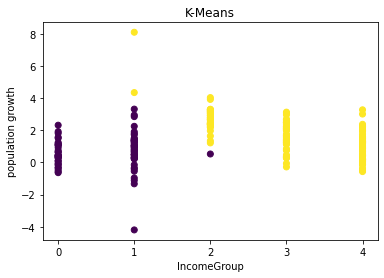

n_cluster = 2, max_iter = 100


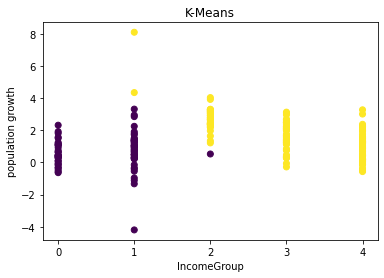

n_cluster = 2, max_iter = 200


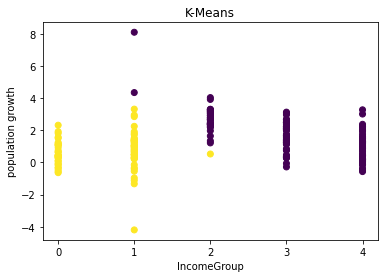

n_cluster = 2, max_iter = 300


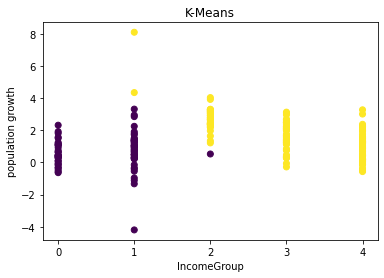

n_cluster = 3, max_iter = 50


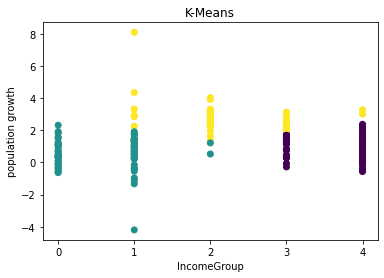

n_cluster = 3, max_iter = 100


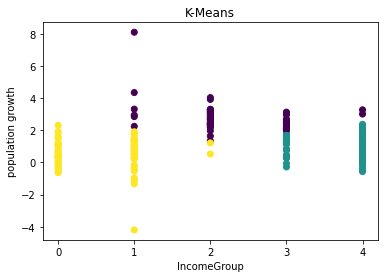

n_cluster = 3, max_iter = 200


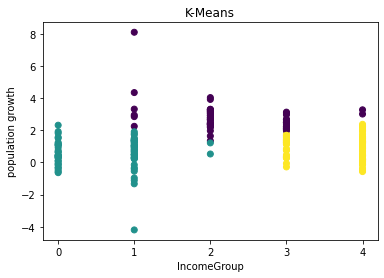

n_cluster = 3, max_iter = 300


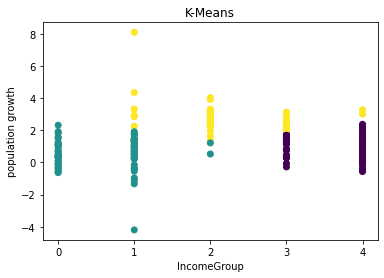

n_cluster = 4, max_iter = 50


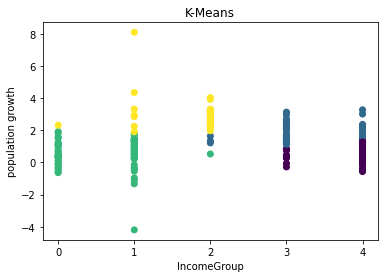

n_cluster = 4, max_iter = 100


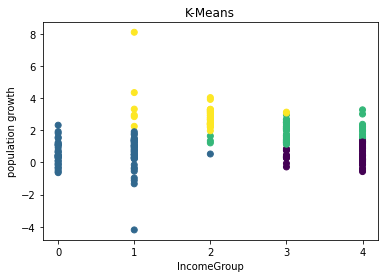

n_cluster = 4, max_iter = 200


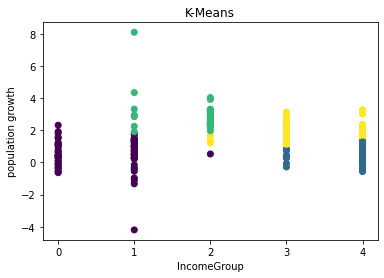

n_cluster = 4, max_iter = 300


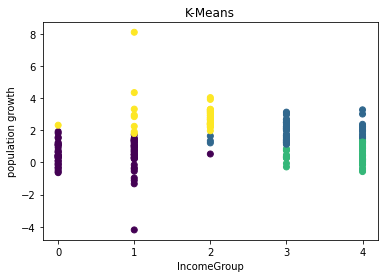

n_cluster = 5, max_iter = 50


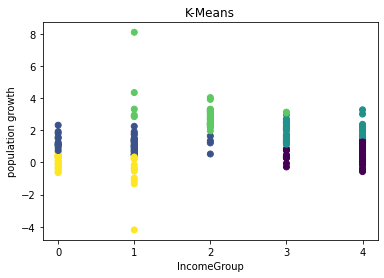

n_cluster = 5, max_iter = 100


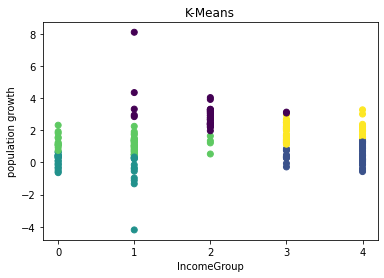

n_cluster = 5, max_iter = 200


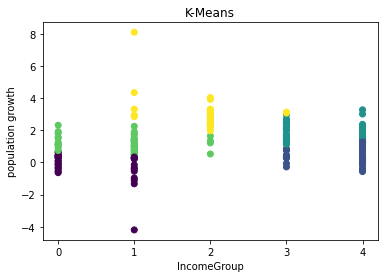

n_cluster = 5, max_iter = 300


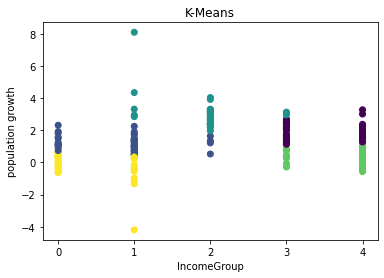

n_cluster = 6, max_iter = 50


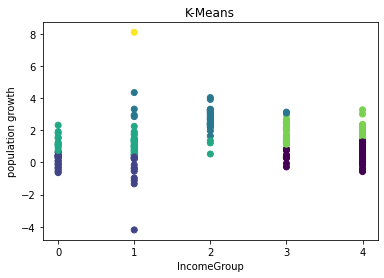

n_cluster = 6, max_iter = 100


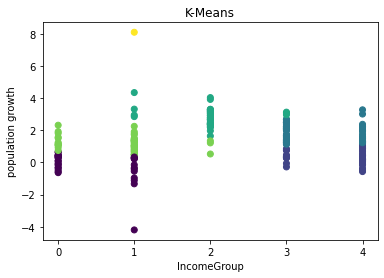

n_cluster = 6, max_iter = 200


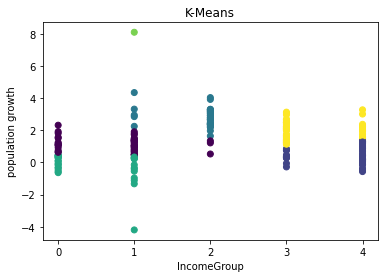

n_cluster = 6, max_iter = 300


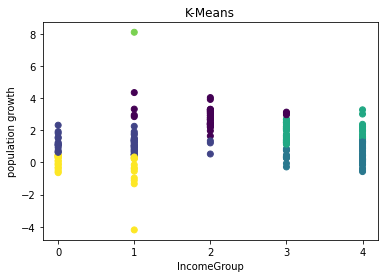

In [106]:
KMEANS_CLUSTERING(df_mergeData, df_data)



eps = 0.001, min_samples = 3


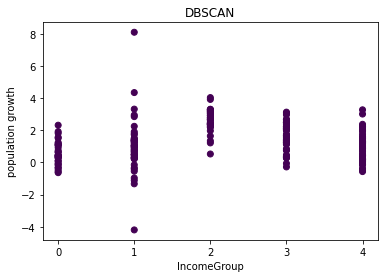

eps = 0.001, min_samples = 5


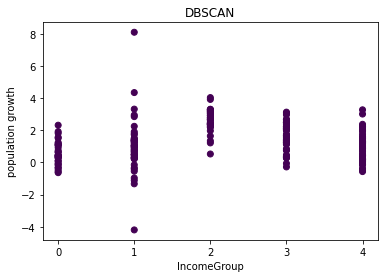

eps = 0.001, min_samples = 10


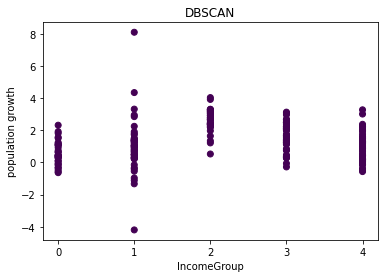

eps = 0.001, min_samples = 15


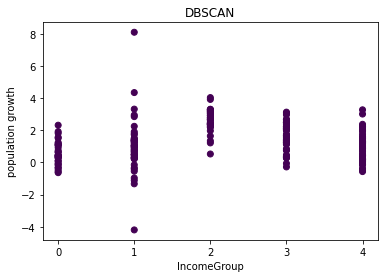

eps = 0.001, min_samples = 20


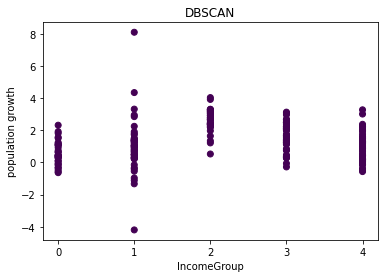

eps = 0.001, min_samples = 30


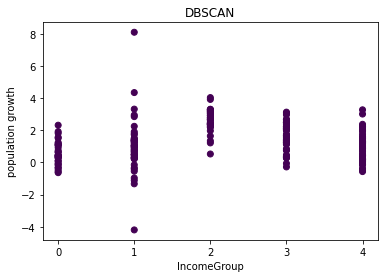

eps = 0.001, min_samples = 50


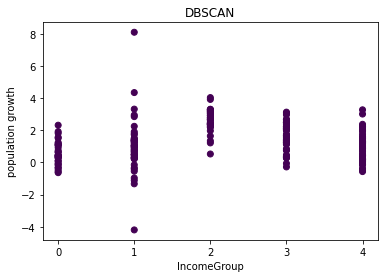

eps = 0.001, min_samples = 100


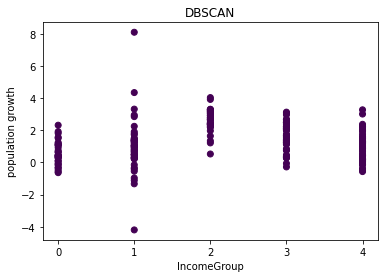

eps = 0.002, min_samples = 3


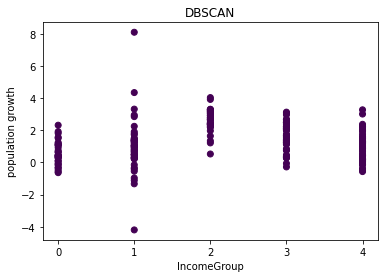

eps = 0.002, min_samples = 5


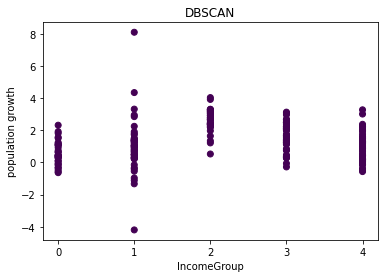

eps = 0.002, min_samples = 10


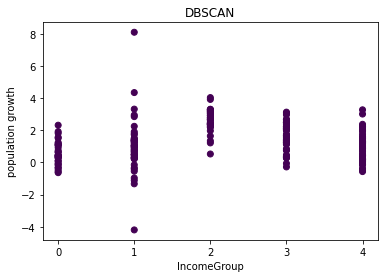

eps = 0.002, min_samples = 15


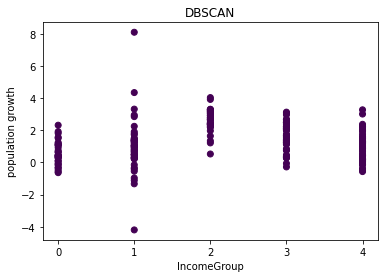

eps = 0.002, min_samples = 20


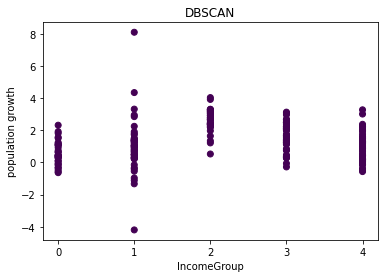

eps = 0.002, min_samples = 30


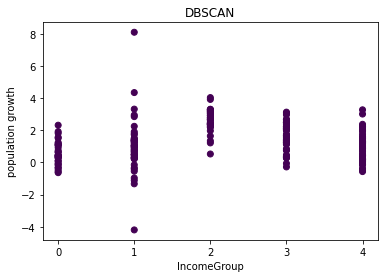

eps = 0.002, min_samples = 50


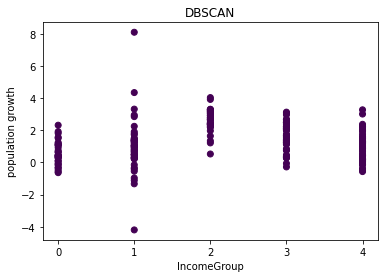

eps = 0.002, min_samples = 100


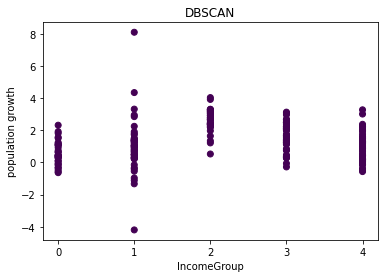

eps = 0.005, min_samples = 3


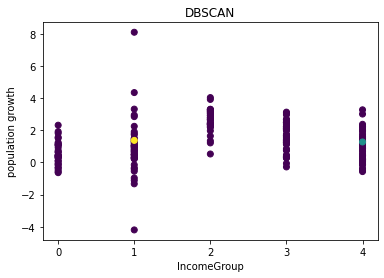

eps = 0.005, min_samples = 5


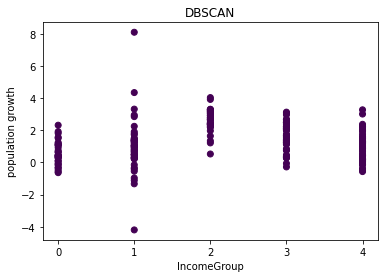

eps = 0.005, min_samples = 10


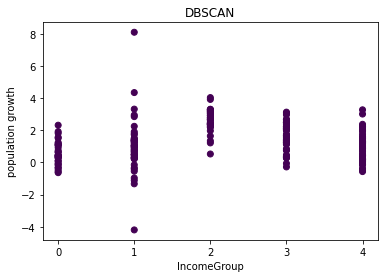

eps = 0.005, min_samples = 15


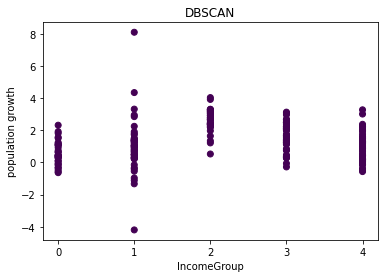

eps = 0.005, min_samples = 20


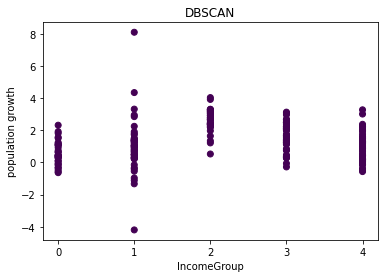

eps = 0.005, min_samples = 30


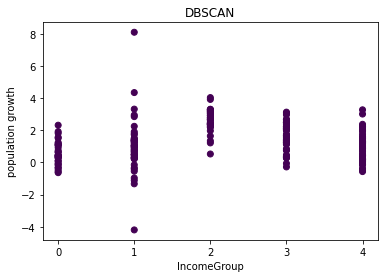

eps = 0.005, min_samples = 50


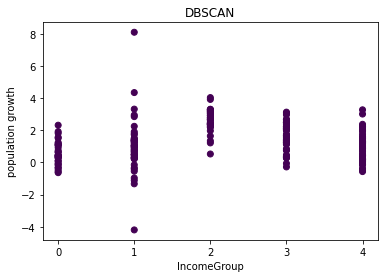

eps = 0.005, min_samples = 100


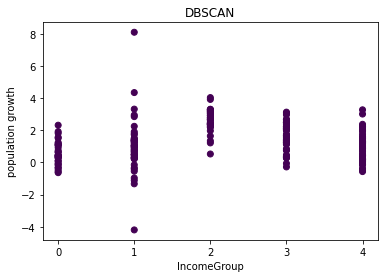

eps = 0.01, min_samples = 3


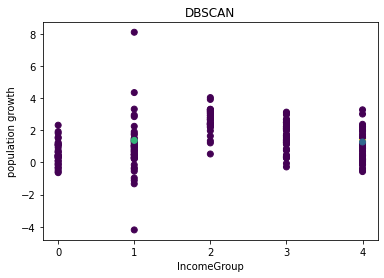

eps = 0.01, min_samples = 5


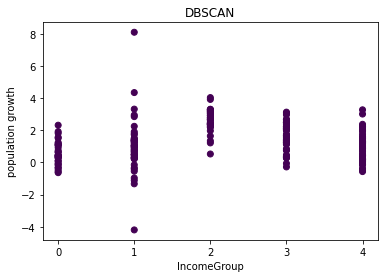

eps = 0.01, min_samples = 10


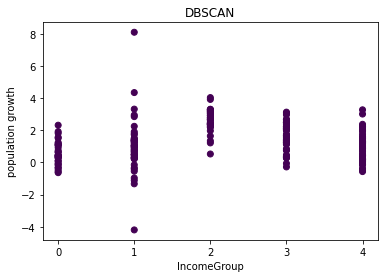

eps = 0.01, min_samples = 15


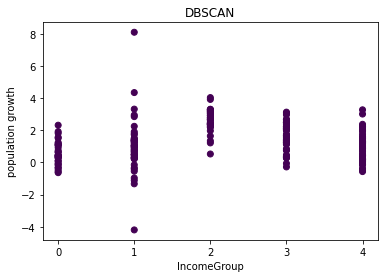

eps = 0.01, min_samples = 20


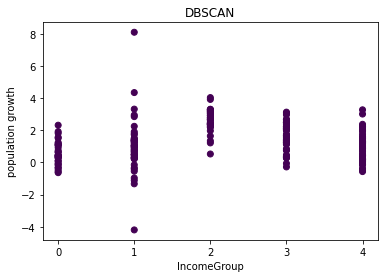

eps = 0.01, min_samples = 30


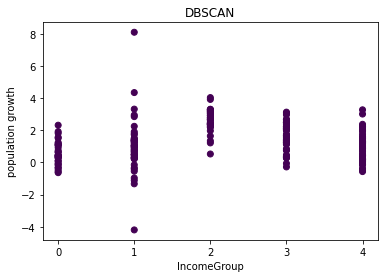

eps = 0.01, min_samples = 50


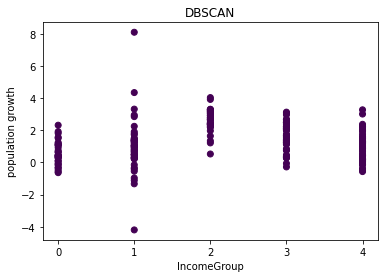

eps = 0.01, min_samples = 100


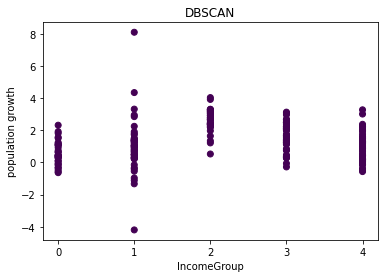

eps = 0.02, min_samples = 3


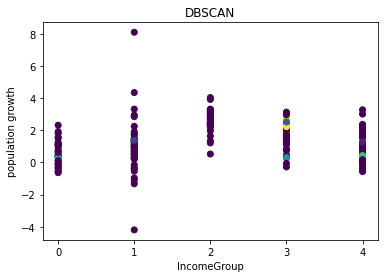

eps = 0.02, min_samples = 5


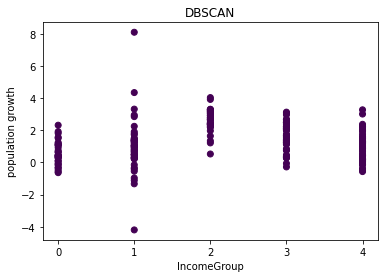

eps = 0.02, min_samples = 10


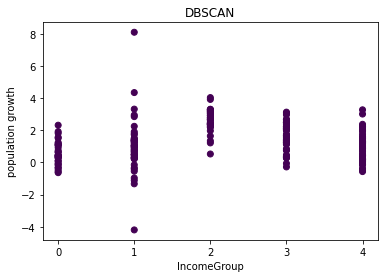

eps = 0.02, min_samples = 15


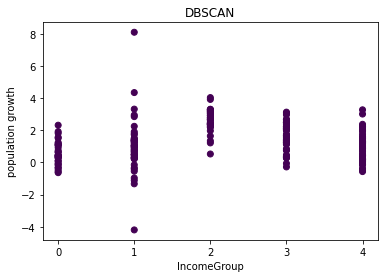

eps = 0.02, min_samples = 20


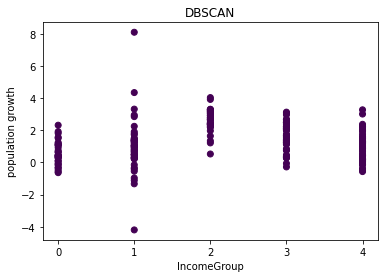

eps = 0.02, min_samples = 30


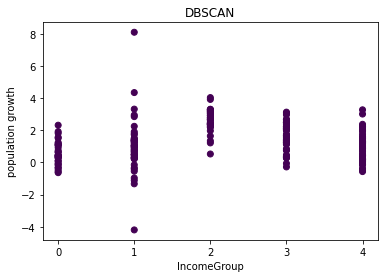

eps = 0.02, min_samples = 50


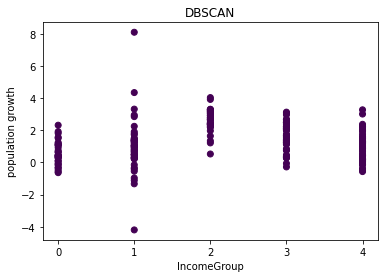

eps = 0.02, min_samples = 100


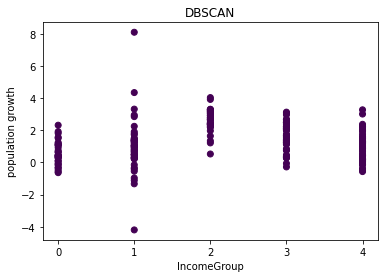

eps = 0.05, min_samples = 3


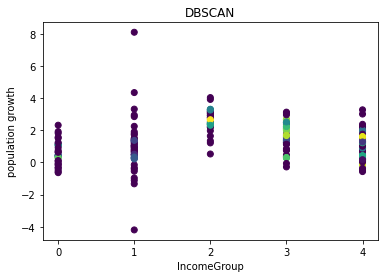

eps = 0.05, min_samples = 5


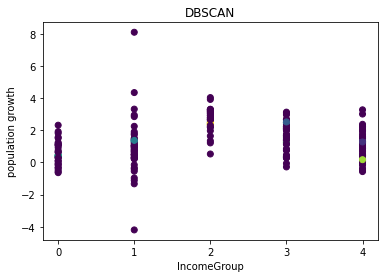

eps = 0.05, min_samples = 10


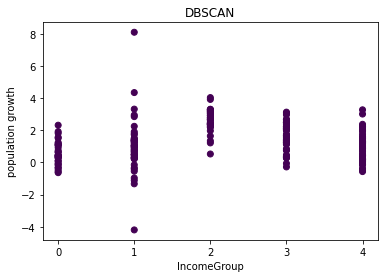

eps = 0.05, min_samples = 15


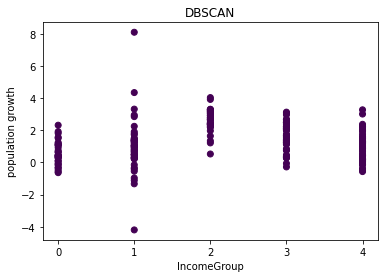

eps = 0.05, min_samples = 20


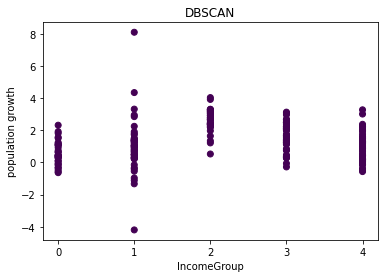

eps = 0.05, min_samples = 30


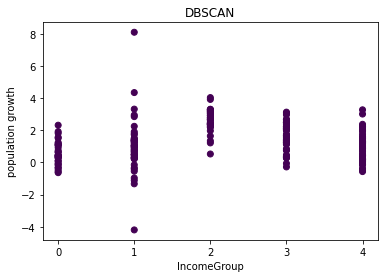

eps = 0.05, min_samples = 50


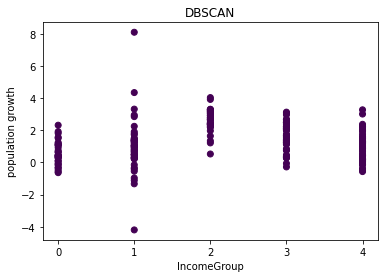

eps = 0.05, min_samples = 100


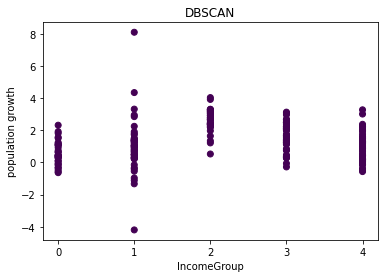

eps = 0.1, min_samples = 3


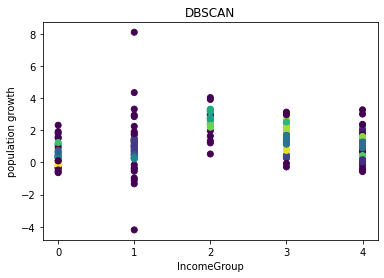

eps = 0.1, min_samples = 5


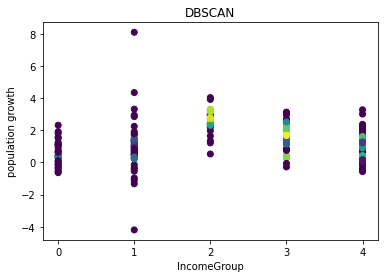

eps = 0.1, min_samples = 10


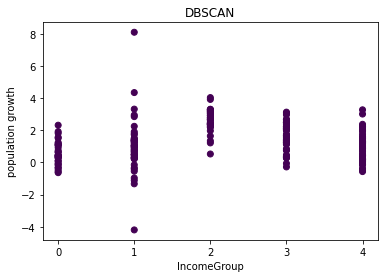

eps = 0.1, min_samples = 15


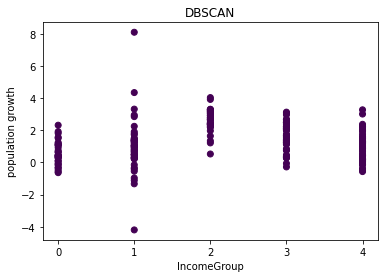

eps = 0.1, min_samples = 20


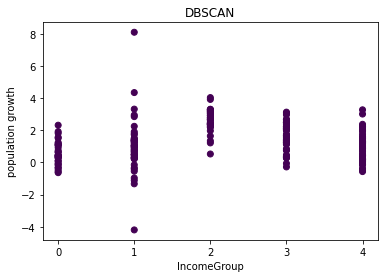

eps = 0.1, min_samples = 30


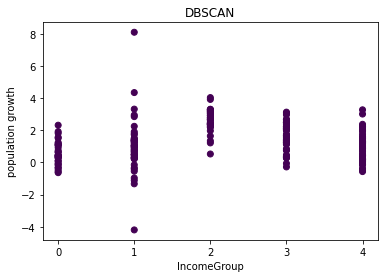

eps = 0.1, min_samples = 50


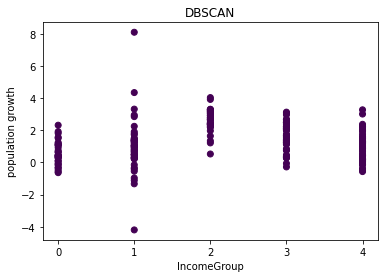

eps = 0.1, min_samples = 100


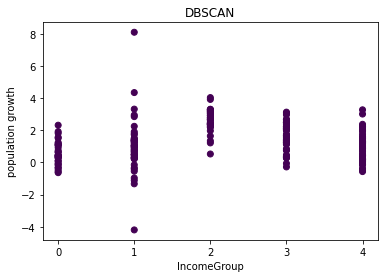

eps = 0.2, min_samples = 3


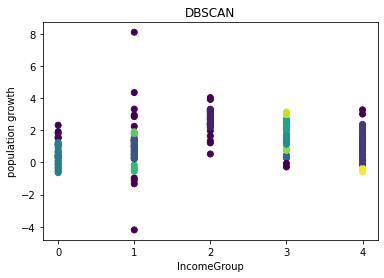

eps = 0.2, min_samples = 5


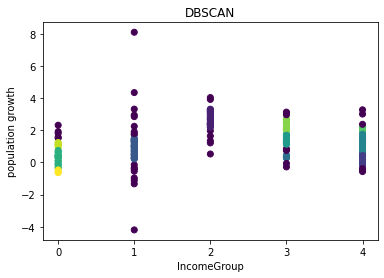

eps = 0.2, min_samples = 10


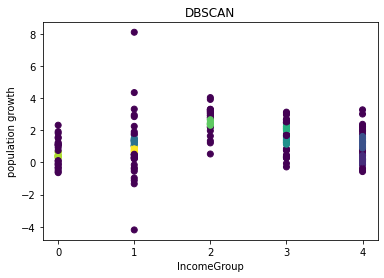

eps = 0.2, min_samples = 15


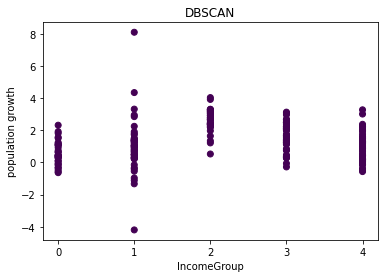

eps = 0.2, min_samples = 20


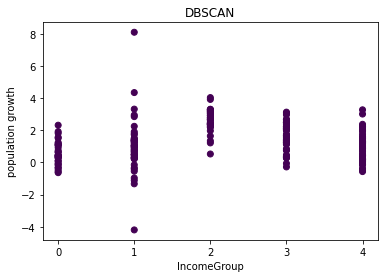

eps = 0.2, min_samples = 30


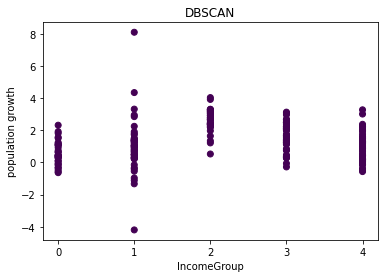

eps = 0.2, min_samples = 50


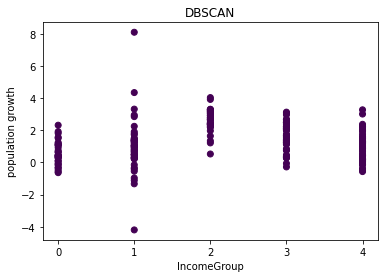

eps = 0.2, min_samples = 100


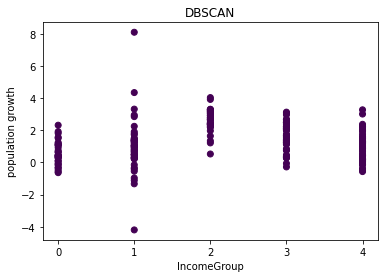

eps = 0.5, min_samples = 3


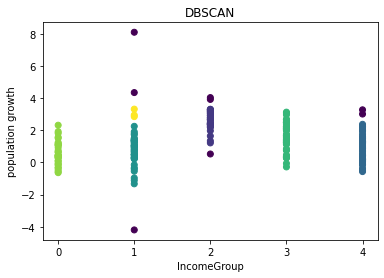

eps = 0.5, min_samples = 5


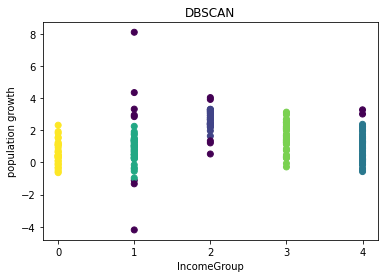

eps = 0.5, min_samples = 10


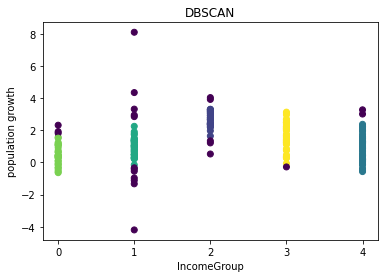

eps = 0.5, min_samples = 15


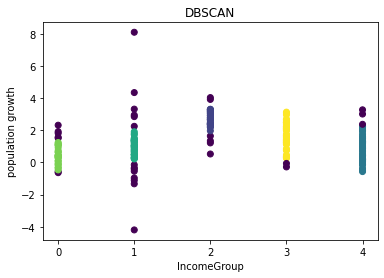

eps = 0.5, min_samples = 20


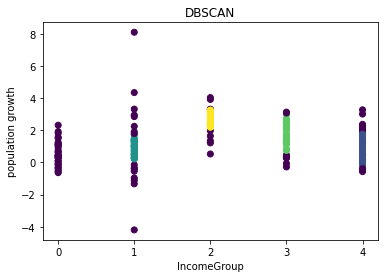

eps = 0.5, min_samples = 30


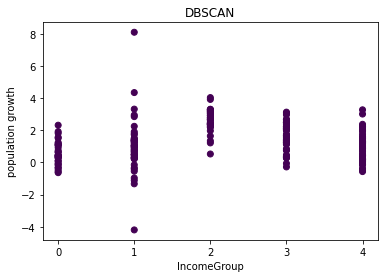

eps = 0.5, min_samples = 50


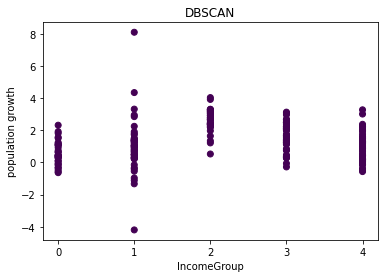

eps = 0.5, min_samples = 100


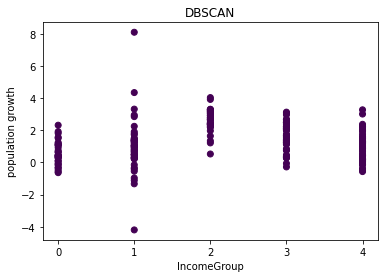

In [107]:
DBSCAN_CLUSTERING(df_mergeData, df_data)


n_components = 2, max_iter = 50


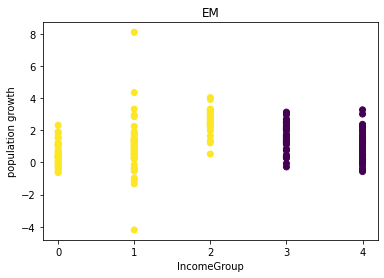

n_components = 2, max_iter = 100


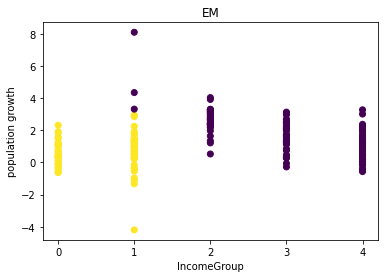

n_components = 2, max_iter = 200


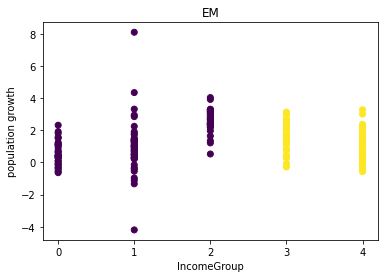

n_components = 2, max_iter = 300


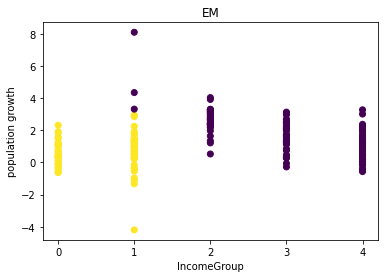

n_components = 3, max_iter = 50


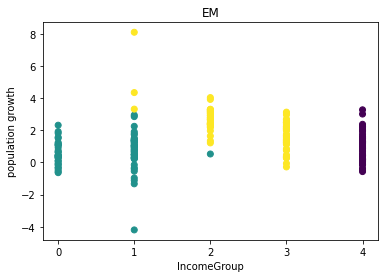

n_components = 3, max_iter = 100


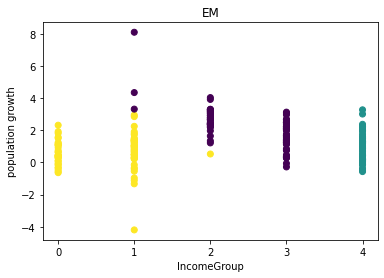

n_components = 3, max_iter = 200


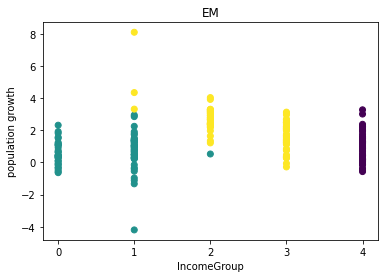

n_components = 3, max_iter = 300


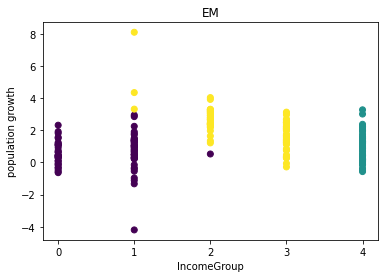

n_components = 4, max_iter = 50


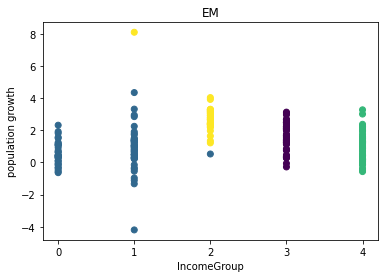

n_components = 4, max_iter = 100


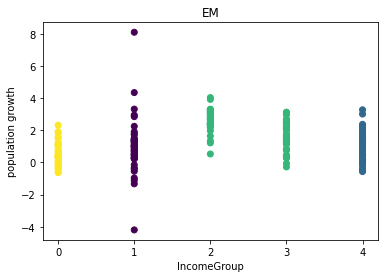

n_components = 4, max_iter = 200


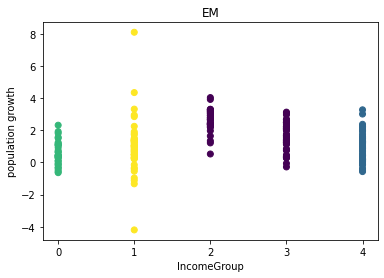

n_components = 4, max_iter = 300


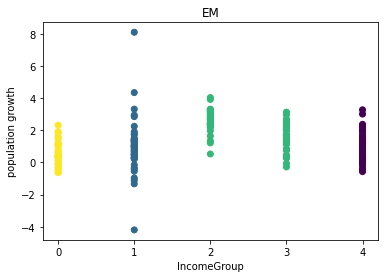

n_components = 5, max_iter = 50


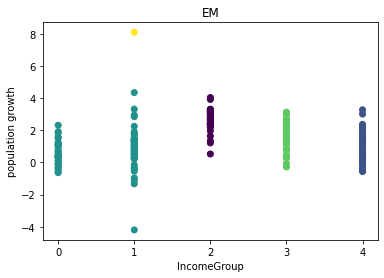

n_components = 5, max_iter = 100


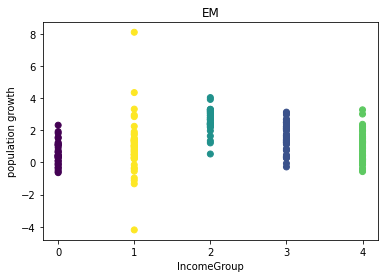

n_components = 5, max_iter = 200


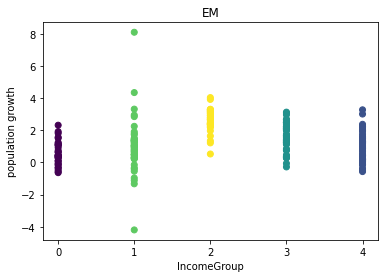

n_components = 5, max_iter = 300


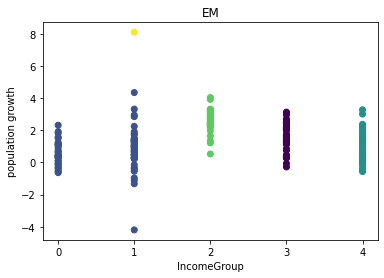

n_components = 6, max_iter = 50


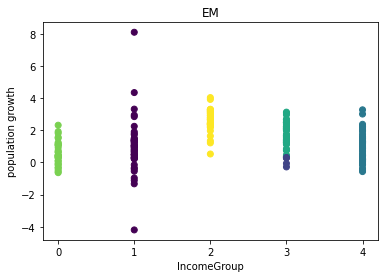

n_components = 6, max_iter = 100


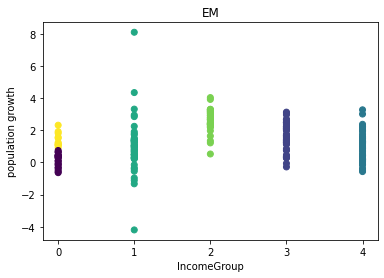

n_components = 6, max_iter = 200


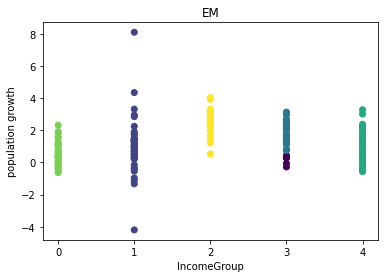

n_components = 6, max_iter = 300


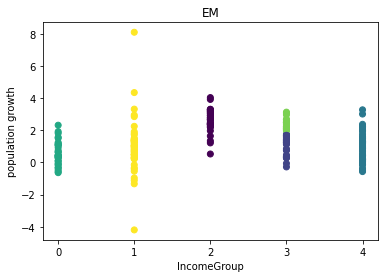

In [108]:
EM_CLUSTERING(df_mergeData, df_data)